# Weather Station Clustering 

## K-means using python & scikit-learn¶


Environment Canada		  
Monthly Values for July - 2015	  	
		
		
Stn_Name::::	Station Name  
Lat	    ::::	Latitude (North + , degrees)  
Long	::::	Longitude (West - , degrees)  
Prov	::::	Province  
Tm	    ::::	Mean Temperature (Â°C)  
DwTm	::::	Days without Valid Mean Temperature  
D	    ::::	Mean Temperature difference from Normal (1981-2010) (Â°C)  
Tx	    ::::	Highest Monthly Maximum Temperature (Â°C)  
DwTx	::::	Days without Valid Maximum Temperature  
Tn	    ::::	Lowest Monthly Minimum Temperature (Â°C)  
DwTn	::::	Days without Valid Minimum Temperature  
S	    ::::	Snowfall (cm)  
DwS	    ::::	Days without Valid Snowfall  
S%N	    ::::	Percent of Normal (1981-2010) Snowfall  
P	    ::::	Total Precipitation (mm)  
DwP	    ::::	Days without Valid Precipitation  
P%N	    ::::	Percent of Normal (1981-2010) Precipitation  
S_G  	::::	Snow on the ground at the end of the month (cm)  
Pd	    ::::	Number of days with Precipitation 1.0 mm or more  
BS	    ::::	Bright Sunshine (hours)  
DwBS	::::	Days without Valid Bright Sunshine  
BS%  	::::	Percent of Normal (1981-2010) Bright Sunshine  
HDD 	::::	Degree Days below 18 Â°C  
CDD	    ::::	Degree Days above 18 Â°C  
Stn_No	::::	Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).  
NA	    ::::	Not Available  

### 1-Download Data

In [3]:
!wget -O weather-stations20140101-20141231.csv https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv

--2017-09-15 10:49:59--  https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv [following]
--2017-09-15 10:50:00--  https://ibm.ent.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.27.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.27.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/7KkGB5jDCTArGy11E8CV5Sf2MmO26WwB11TcJYll_LQax3oWN_aJkbsv9_A-BImQcfqIgQ07XZbbs8ghO1UzE_3hSh_zCe_uY6AAHfkwtRRZbwgcCjDS0H41Vg6txwjWqYctyK0t2v31Bw8U1CtswVS51QqM4GWBUc6Hb8WLnpmKqnztbJuZoq45nck1gm8s9BaJfudVILjAGodCYI1gBLcl58pY0fsatPP6tD0eNL_tuNXAw5lN62C_K4U6SK2hpv6ScEKyxyaGlNNSWBGXj0EAL

### 2- Load data

In [4]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0,NaN,13.5,0,1.0,...,0,NaN,0,12,NaN,NaN,NaN,273.3,0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NaN,NaN,NaN,307.0,0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NaN,NaN,11,NaN,NaN,NaN,168.1,0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NaN,NaN,11,NaN,NaN,NaN,267.7,0,1012573


### 3- Clean data

In [5]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0,NaN,13.5,0,1.0,...,0,NaN,0,12,NaN,NaN,NaN,273.3,0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NaN,NaN,NaN,307.0,0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NaN,NaN,11,NaN,NaN,NaN,168.1,0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NaN,NaN,11,NaN,NaN,NaN,267.7,0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NaN,13.1,0,1.9,...,8,NaN,NaN,12,NaN,NaN,NaN,258.6,0,1012710


### 4- Visualization of data

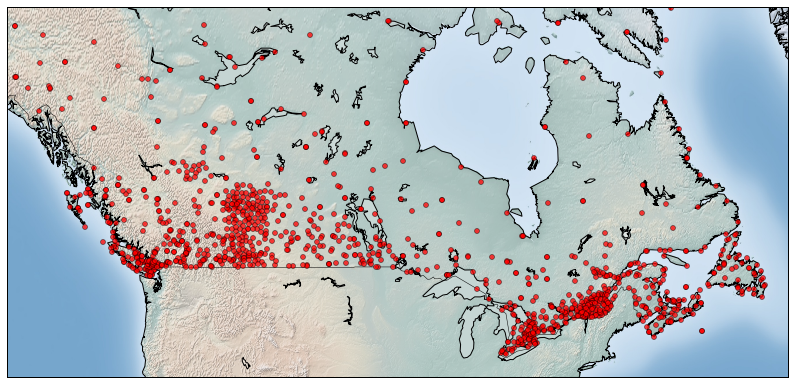

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon = -140
ulon = -50
llat = 40
ulat = 65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



### 5-Clustering based on temperature

In [7]:
from sklearn.cluster import KMeans
import sklearn.utils
from sklearn.preprocessing import StandardScaler
clusterNum = 7
sklearn.utils.check_random_state(1000)

Clus_dataSet = zip(np.asarray(pdf.xm),np.asarray(pdf.ym))
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet=StandardScaler().fit_transform(Clus_dataSet)
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_
pdf["Clus_km"] = labels

# A sample of clusters
pdf[["Stn_Name","xm","ym","Tx","Tm","Clus_km"]].head(5)

,Stn_Name,xm,ym,Tx,Tm,Clus_km
0,CHEMAINUS,1807806.266120,1396332.287866,13.5,8.2,2
1,COWICHAN LAKE FORESTRY,1764329.070275,1377564.348686,15.0,7.0,2
2,LAKE COWICHAN,1773335.855092,1378408.856386,16.0,6.8,2
3,DUNCAN KELVIN CREEK,1809362.994360,1362546.186690,14.5,7.7,2
4,ESQUIMALT HARBOUR,1841498.313029,1311615.319829,13.1,8.8,2


### 6- Visualize the clusters

/usr/local/src/bluemix_jupyter_bundle.v61/notebook/lib/python2.7/site-packages/matplotlib/lines.py:1107: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


Cluster 0, Avg Temp: -9.67443946188
Cluster 1, Avg Temp: -15.0651090343
Cluster 2, Avg Temp: 1.51114982578
Cluster 3, Avg Temp: -19.3818181818
Cluster 4, Avg Temp: -29.264516129
Cluster 5, Avg Temp: -19.0985714286
Cluster 6, Avg Temp: -15.2628787879


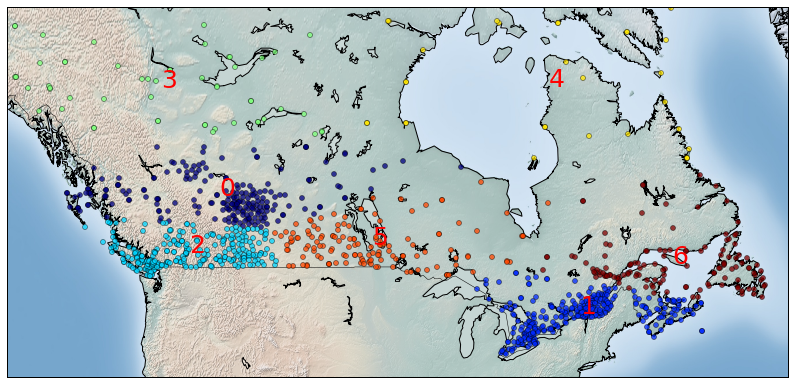

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in pdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =colors[np.int(row.Clus_km)],  marker='o', markersize= 5, alpha = 0.75)

for i in range(clusterNum): 
    cluster = pdf[["Stn_Name","Tm","xm","ym","Clus_km"]][pdf.Clus_km==i]
    cenx = np.mean(cluster.xm) 
    ceny = np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))

In [10]:
from sklearn.cluster import KMeans
import sklearn.utils
from sklearn.preprocessing import StandardScaler
clusterNum = 7
sklearn.utils.check_random_state(1000)

Clus_dataSet = zip(np.asarray(pdf.xm),np.asarray(pdf.ym),np.asarray(pdf.Tx),np.asarray(pdf.Tn),np.asarray(pdf.Tm))
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet=StandardScaler().fit_transform(Clus_dataSet)
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_
pdf["Clus_km"]=labels

# A sample of clusters
pdf[["Stn_Name","xm","ym","Tx","Tm","Clus_km"]].head(5)

,Stn_Name,xm,ym,Tx,Tm,Clus_km
0,CHEMAINUS,1807806.266120,1396332.287866,13.5,8.2,1
1,COWICHAN LAKE FORESTRY,1764329.070275,1377564.348686,15.0,7.0,1
2,LAKE COWICHAN,1773335.855092,1378408.856386,16.0,6.8,1
3,DUNCAN KELVIN CREEK,1809362.994360,1362546.186690,14.5,7.7,1
4,ESQUIMALT HARBOUR,1841498.313029,1311615.319829,13.1,8.8,1


Cluster 0, Avg Temp: -9.21495327103
Cluster 1, Avg Temp: 5.38578199052
Cluster 2, Avg Temp: -20.1124260355
Cluster 3, Avg Temp: -16.3312693498
Cluster 4, Avg Temp: -28.5055555556
Cluster 5, Avg Temp: -8.1684981685
Cluster 6, Avg Temp: -17.8538461538


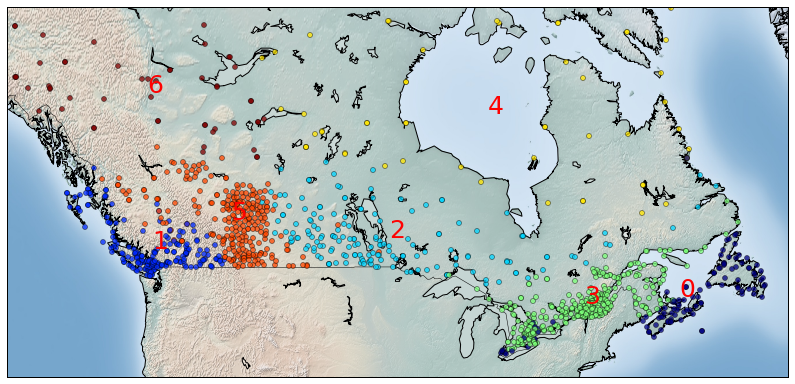

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in pdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =colors[np.int(row.Clus_km)],  marker='o', markersize= 5, alpha = 0.75)

for i in range(clusterNum): 
    cluster = pdf[["Stn_Name","Tm","xm","ym","Clus_km"]][pdf.Clus_km==i]
    cenx=np.mean(cluster.xm) 
    ceny=np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2016 [Cognitive Class](https://cognitiveClass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).